In [19]:
import math


unimodal_functions = {
    '-5x^5 + 4x^4 - 12x^3 + 11x^2 - 2x + 1, [-0.5,0.5]': (lambda x: -5*x**5 + 4*x**4 - 12*x**3 + 11*x**2 - 2*x + 1, (-0.5,0.5)),
    'lg(x-2)^2 + lg(10-x)^2 - x^0.2, [6.9,9]': (lambda x: math.log10(x-2)**2 + math.log10(10-x)**2 - math.pow(x,0.2), (6,9.9)),
    '-3x*sin(0.75x) + e^(-2x), [0,2pi]': (lambda x: -3*x*math.sin(0.75*x) + math.exp(-2*x), (0,2*math.pi)),
    'e^(3x) + 5e^(-2x), [0,1]': (lambda x: math.exp(3*x) + 5*math.exp(-2*x), (0,1)),
    '0.2x*lg(x) + (x-2.3)^2, [0.5,2.5]': (lambda x: 0.2*x*math.log10(x) + (x - 2.3)**2, (0.5,2.5))
}


In [20]:

def dichotomy_method(function,start,end,epsilon=1e-5):
    delta = 0.25 * epsilon
    function_calls_number = 0
    step_details = []

    while end - start > epsilon:
        center = 0.5 * (start + end)
        a = function(center - delta)
        b = function(center + delta)
        function_calls_number += 2
        if a > b:
            start = center - delta
        elif a < b:
            end = center + delta
        else:
            start = center - delta
            end = center + delta
        step_details.append((start, end, 0.5 * (a + b) , a if a < b else b))
    return 0.5 * (start + end), function_calls_number, step_details


In [21]:

def golden_ratio_method(function,start,end,epsilon=1e-5):
    function_calls_number = 0
    step_details = []
    phi = 0.5 * (3 - math.sqrt(5))

    x1 = start + (end - start)*phi
    x2 = end - (end - start)*phi

    x1_value = function(x1)
    x2_value = function(x2)
    function_calls_number += 2

    while end - start > epsilon:
        if x1_value > x2_value:
            start = x1
            x1 = x2
            x2 = end + start - x1
            x1_value = x2_value
            x2_value = function(x2)
        else:
            end = x2
            x2 = x1
            x1 = start + end - x2
            x2_value = x1_value
            x1_value = function(x1)
        function_calls_number += 1
        step_details.append((start, end, x1 if x1_value < x2_value else x2, x1_value if x1_value < x2_value else x2_value))
    return 0.5 * (x1 + x2), function_calls_number, step_details


In [22]:

def get_n_fibonacci(number):
    fs = [1, 1]
    for i in range(1,number):
        fs.append(fs[i] + fs[i-1])
    return fs


def get_fibonacci_less(number):
    fs = [1, 1]
    i = 1
    while fs[i] < number:
        fs.append(fs[i] + fs[i-1])
        i += 1
    return fs


def fibonacci_method(function,start,end,iterations=0,epsilon=1e-5):
    function_calls_number = 0
    step_details = []
    if iterations < 1:
        fibonacci_sequence = get_fibonacci_less((end-start)/epsilon)
        iterations = len(fibonacci_sequence)
    else:
        fibonacci_sequence = get_n_fibonacci(iterations)
    
    x1 = start + (end - start)*fibonacci_sequence[iterations-3]/fibonacci_sequence[iterations-1]
    x2 = start + (end - start)*fibonacci_sequence[iterations-2]/fibonacci_sequence[iterations-1]

    x1_value = function(x1)
    x2_value = function(x2)
    function_calls_number += 2

    while iterations > 2:
        if x1_value > x2_value:
            start = x1
            x1 = x2
            x2 = end - (x1 - start)
            x1_value = x2_value
            x2_value = function(x2)
        else:
            end = x2
            x2 = x1
            x1 = start + end - x2
            x2_value = x1_value
            x1_value = function(x1)
        step_details.append((start, end, x1 if x1_value < x2_value else x2, x1_value if x1_value < x2_value else x2_value))
        function_calls_number += 1
        iterations -= 1
    return 0.5 * (x1 + x2), function_calls_number, step_details


In [23]:

def quadratic_minimum(x1, x2, x3, y1, y2, y3):
    return x2 - 0.5 * ((x2 - x1) ** 2 * (y2 - y3) - (x2 - x3) ** 2 * (y2 - y1)) / (
            (x2 - x1) * (y2 - y3) - (x2 - x3) * (y2 - y1))


def quadratic_method(function,start,end,epsilon=1e-5):
    function_calls_number = 0
    step_details = []
    pivot = 0.5 * (start + end)

    start_value = function(start)
    pivot_value = function(pivot)
    end_value = function(end)

    function_calls_number += 3
    
    pivot_step = 0.01 * (end + start)
    if start_value < pivot_value:
        pivot_step = -pivot_step
        u_prev = end
    else:
        u_prev = start
    while start_value < pivot_value or end_value < pivot_value:
        pivot += pivot_step
        pivot_value = function(pivot)
        function_calls_number += 1
 
    u = quadratic_minimum(start, pivot, end, start_value, pivot_value, end_value)

    while abs(u - u_prev) > epsilon:
        u_value = function(u)
        if u <= pivot and u_value > pivot_value:
            start = u
            start_value = u_value
        elif u > pivot and u_value > pivot_value:
            end = u
            end_value = u_value
        elif u > pivot and u_value <= pivot_value:
            start = pivot
            start_value = pivot_value
            pivot = u
            pivot_value = u_value
        elif u <= pivot and u_value <= pivot_value:
            end = pivot
            end_value = pivot_value
            pivot = u
            pivot_value = u_value
        u_prev = u
        u = pivot - 0.5 * (((pivot - start) ** 2) * (pivot_value - end_value) - ((pivot - end) ** 2) * (pivot_value - start_value)) / (
            (pivot - start) * (pivot_value - end_value) - (pivot - end) * (pivot_value - start_value))
        step_details.append((start, end, u, u_value))
        function_calls_number += 1
    return 0.5 * (u + u_prev), function_calls_number, step_details


In [24]:
import numpy as np


def brent_method(function, start, end, epsilon=1e-5):
    step_details = []
    phi = 0.5 * (3 - math.sqrt(5))

    x = w = v = (start + end) / 2
    x_value = w_value = v_value = function(x)
    function_calls_number = 3

    d = e = end - start
    g = 0
    while abs(d - g) > epsilon:
        g, e = e, d

        if len({x, w, v}) == len({x_value, w_value, v_value}) == 3:
            u = quadratic_minimum(x, w, v, x_value, w_value, v_value)
            if start + epsilon < u < end - epsilon and abs(u - x) < 0.5 * g:
                d = abs(u - x)
        else:
            if x < 0.5 * (end + start):
                u = x + phi * (end - x)
                d = end - x
            else:
                u = x - phi * (x - start)
                d = x - start
        if abs(u - x) < epsilon:
            u = x + np.sign(u - x) * epsilon
        u_value = function(u)
        function_calls_number += 1
        if u_value <= x_value:
            if u >= x:
                start = x
            else:
                end = x
            v, w, x = w, x, u
            v_value, w_value, x_value = w_value, x_value, u_value
        else:
            if u >= x:
                end = x
            else:
                start = x
            if u_value <= w_value or w == x:
                v, w = w, u
                v_value, w_value = w_value, u_value
            elif u_value <= v_value or w == v or v == x:
                v = u
                v_value = u_value
        step_details.append((start, end, u, u_value))
    return x, function_calls_number, step_details
              


In [25]:
import pandas


methods = {
    'dichotomy': dichotomy_method,
    'golden ratio': golden_ratio_method,
    'fibonacci': fibonacci_method,
    'quadratic': quadratic_method,
    'brent': brent_method
}

table_columns = [
    'x', 'function calls', 'iterations'
]

results = {}
for readable_func in unimodal_functions:
    func = unimodal_functions[readable_func][0]
    start_range, end_range = unimodal_functions[readable_func][1]

    data = []
    for method_name in methods:
        data.append(methods[method_name](func,start_range,end_range) + (method_name,))

    results[readable_func] = data
    print(readable_func)
    print(pandas.DataFrame([(x[0], x[1], len(x[2])) for x in data],methods.keys(),table_columns))
    print()



-5x^5 + 4x^4 - 12x^3 + 11x^2 - 2x + 1, [-0.5,0.5]
                     x  function calls  iterations
dichotomy     0.109861              36          18
golden ratio  0.109858              26          24
fibonacci     0.109866              26          24
quadratic     0.109864              12           9
brent         0.109863              10           7

lg(x-2)^2 + lg(10-x)^2 - x^0.2, [6.9,9]
                     x  function calls  iterations
dichotomy     8.726906              40          20
golden ratio  8.726907              29          27
fibonacci     8.726907              29          27
quadratic     8.726781             116         113
brent         8.694834               6           3

-3x*sin(0.75x) + e^(-2x), [0,2pi]
                     x  function calls  iterations
dichotomy     2.706474              42          21
golden ratio  2.706476              30          28
fibonacci     2.706469              30          28
quadratic     2.706474              11           8
brent  

In [26]:
import os


iterations_table_columns = [
    'x', 'y', 'segment length', 'diff'
]

function_number = 1

for readable_func in results:
    path = f'{os.getcwd()}\\iterations\\{function_number}'
    function_number += 1
    try:
        os.mkdir(path)
    except FileExistsError:
        pass
    for method_info in results[readable_func]:
        prev_segment = 0
        data = []
        for iteration in range(len(method_info[2])):
            segment_length = method_info[2][iteration][1] - method_info[2][iteration][0]
            data.append((method_info[2][iteration][2], method_info[2][iteration][3], segment_length, '-' if prev_segment == 0 else segment_length / prev_segment))
            prev_segment = segment_length
        pandas.DataFrame(data,columns=iterations_table_columns,index=range(1, 1+len(method_info[2]))).to_csv(f'{path}\\{method_info[3]}.csv',index_label='iteration')



<ipython-input-27-6991ad3da533>:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


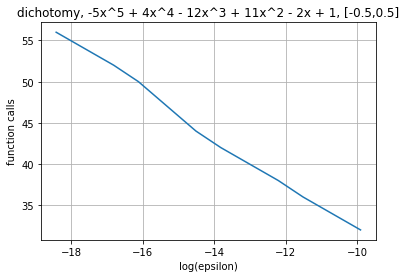

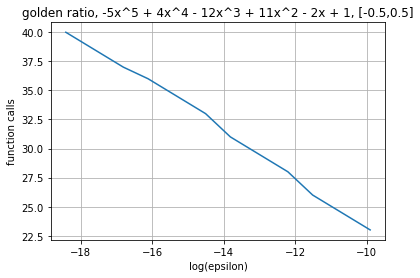

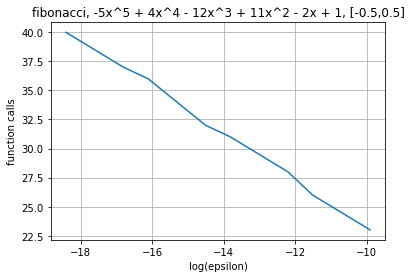

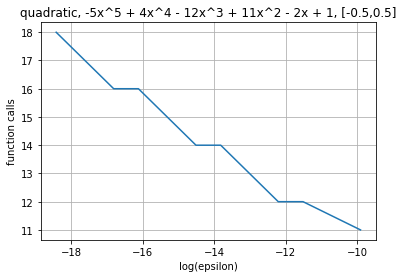

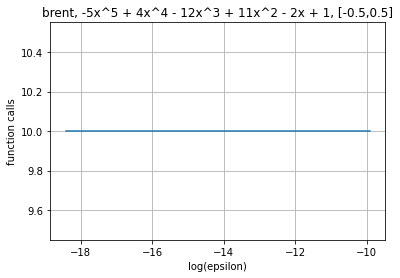

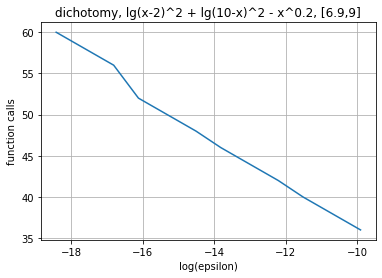

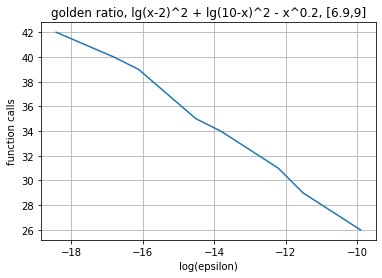

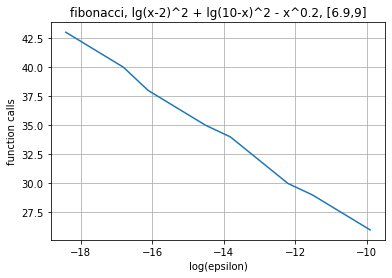

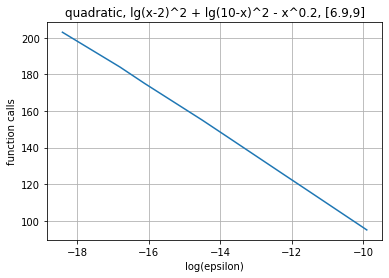

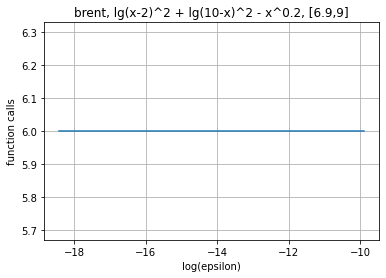

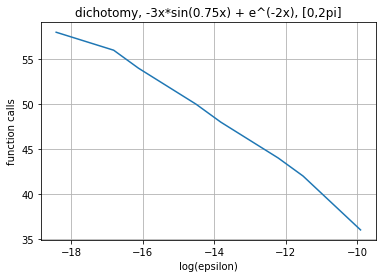

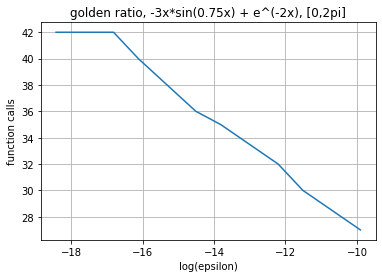

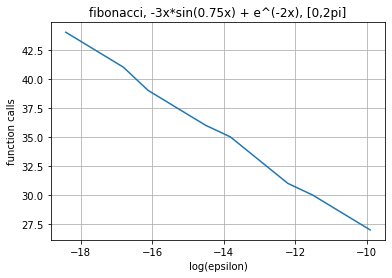

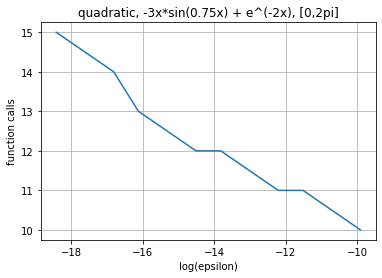

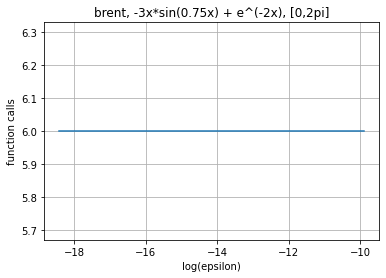

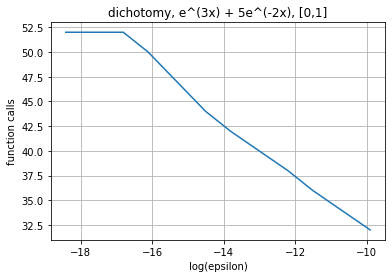

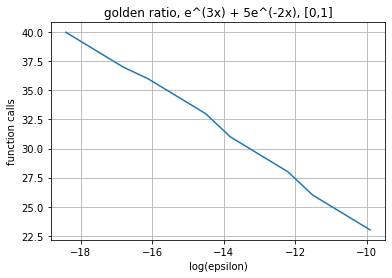

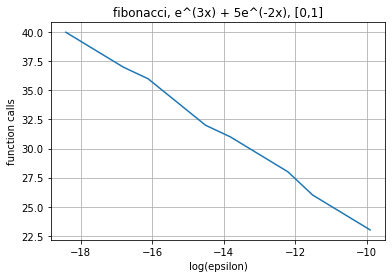

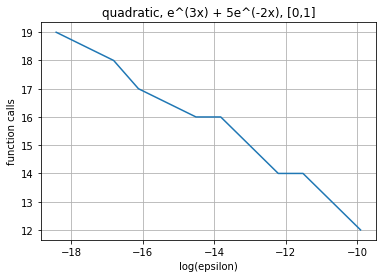

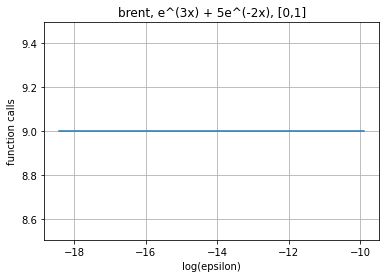

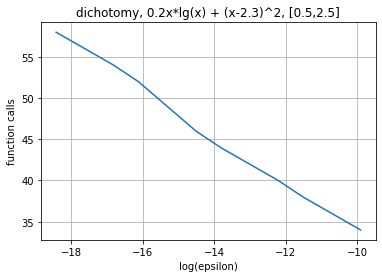

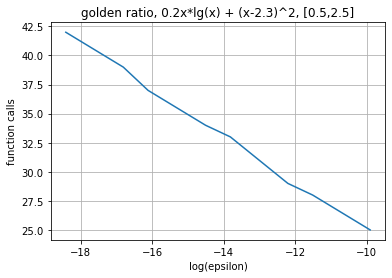

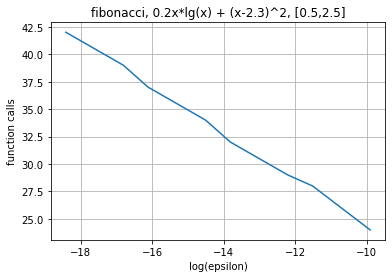

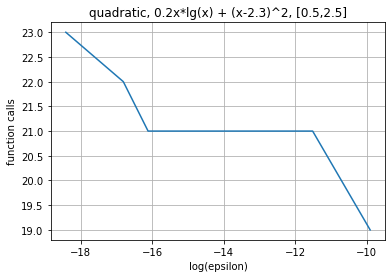

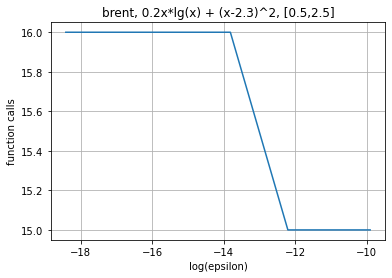

In [27]:
import matplotlib.pyplot as plt


precision_values = [
    1e-8, 5e-8, 1e-7, 5e-7, 1e-6, 5e-6, 1e-5, 5e-5
]

function_number = 1

results = {}
for readable_func in unimodal_functions:
    path = f'{os.getcwd()}\\plots\\{function_number}'
    function_number += 1

    try:
        os.mkdir(path)
    except FileExistsError:
        pass

    func = unimodal_functions[readable_func][0]
    start_range, end_range = unimodal_functions[readable_func][1]

    for method_name in methods:
        fig, ax = plt.subplots()
        ax.plot([math.log(x) for x in precision_values],[methods[method_name](func,start_range,end_range,epsilon=x)[1] for x in precision_values])
        ax.set(xlabel='log(epsilon)', ylabel='function calls', title=f'{method_name}, {readable_func}')
        ax.grid()
        fig.savefig(f'{path}\\{method_name}.jpg')

